In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
# import seaborn as sns

import holidays

from sklearn.metrics import r2_score, mean_absolute_error
# import math 

# sns.set()

# random_state = 123_456
# np.random.seed(random_state)

In [3]:
holiday_list = list()

for date, name in holidays.AU(prov='NSW', years=[2016,2017,2018,2019,2020]).items():
    holiday_list.append(dict(ds=date,holiday=name))
    
df_holidays = pd.DataFrame(holiday_list)
# df_holidays

In [4]:
df = pd.read_csv('fuel-prices/all_features_combined.csv', dtype={'price': np.int32, 
                 'tapis_oil_price': np.int32, 'national_avg_price': np.int32}, parse_dates=True)
# df.set_index(pd.date_range(min(df.index), periods=df.shape[0], freq='D'), inplace=True, verify_integrity=True)
df

date  price  tapis_oil_price_t_minus_10  national_avg_price  \
0     2017-01-01   1417                        5863                1184   
1     2017-01-02   1436                        5863                1184   
2     2017-01-03   1409                        5863                1184   
3     2017-01-04   1542                        5863                1186   
4     2017-01-05   1582                        5863                1191   
...          ...    ...                         ...                 ...   
1090  2019-12-27   1608                        7084                1336   
1091  2019-12-28   1589                        7103                1349   
1092  2019-12-29   1579                        7159                1349   
1093  2019-12-30   1602                        7198                1349   
1094  2019-12-31   1609                        7177                1357   

      sgd_exchange_rate_t_minus_6  usd_exchange_rate  volume_in_ml  \
0                          1.0425             0.7186          18.7   
1                          1.0425             0.7186          18.7   
2                          1.0425             0.7226          18.7   
3                          1.0425             0.7284          18.7   
4                          1.0425             0.7337          18.7   
...                           ...                ...           ...   
1090                       0.9386             0.6978          14.3   
1091                       0.9386             0.6995          14.3   
1092                       0.9386             0.6995          14.3   
1093                       0.9382             0.6995          14.3   
1094                       0.9377             0.7022          14.3   

      wholesale_price_t_minus_4  wholesale_cluster_label  \
0                          1183                        1   
1                          1183                        1   
2                          1183                        0   
3                          1183                        0   
4                          1183                        0   
...                         ...                      ...   
1090                       1332                        0   
1091                       1332                        0   
1092                       1335                        0   
1093                       1336                        0   
1094                       1338                        0   

      tapis_oil_cluster_label  price_t_plus_1  
0                           1            1436  
1                           1            1409  
2                           1            1542  
3                           1            1582  
4                           1            1529  
...                       ...             ...  
1090                        0            1589  
1091                        0            1579  
1092                        0            1602  
1093                        0            1609  
1094                        0            1609  

[1095 rows x 11 columns]

In [5]:
features = ['date','price']

In [6]:
df_m = df[features].copy()
# df_m.price /= 1_000 
df_m.rename(columns={'date': 'ds', 'price': 'y'}, inplace=True)
df_m

ds     y
0     2017-01-01  1417
1     2017-01-02  1436
2     2017-01-03  1409
3     2017-01-04  1542
4     2017-01-05  1582
...          ...   ...
1090  2019-12-27  1608
1091  2019-12-28  1589
1092  2019-12-29  1579
1093  2019-12-30  1602
1094  2019-12-31  1609

[1095 rows x 2 columns]

In [7]:
m = Prophet(daily_seasonality=False, holidays=df_holidays, holidays_prior_scale=0.5)
m.fit(df_m)

In [8]:
periods = int(365 / 2)

In [9]:
future = m.make_future_dataframe(periods=periods)
future.tail()

ds
1272 2020-06-26
1273 2020-06-27
1274 2020-06-28
1275 2020-06-29
1276 2020-06-30

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
1272 2020-06-26  1752.963130  1614.678640  1886.032922
1273 2020-06-27  1746.444748  1609.176247  1880.429960
1274 2020-06-28  1747.943531  1606.033619  1883.715203
1275 2020-06-29  1752.969169  1616.627179  1902.086764
1276 2020-06-30  1753.683574  1623.936271  1888.910635

In [19]:
y_hat = forecast.iloc[1095:1102][['yhat']]
y_hat

yhat
1095  1586.876029
1096  1662.765593
1097  1661.173670
1098  1657.066669
1099  1660.905825
1100  1668.130999
1101  1670.839103

In [21]:
y_true = pd.Series(np.array([1594,1595,1602,1561,1567,1636,1667]), index=y_hat.index)
# y_true = pd.Series(np.array([1610,1609,1612,1611,1613,1612,1611]), index=y_hat.index)
y_true = y_true.rename('y_hat').to_frame()
y_true

y_hat
1095   1594
1096   1595
1097   1602
1098   1561
1099   1567
1100   1636
1101   1667

In [22]:
r2_score(y_true, y_hat)

-2.24623548187702

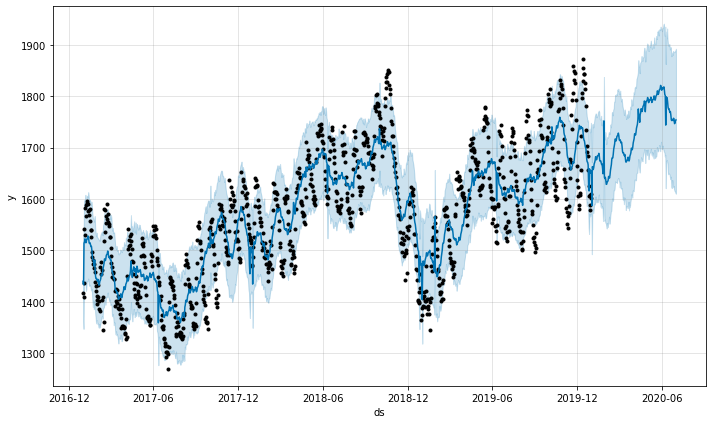

In [41]:
fig1 = m.plot(forecast)

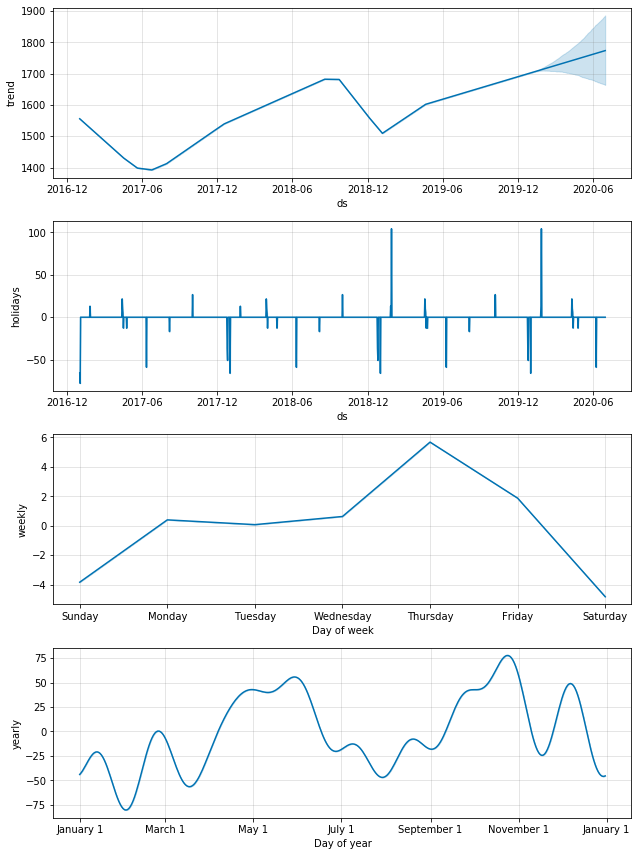

In [26]:
fig2 = m.plot_components(forecast)

In [12]:
# from fbprophet.plot import plot_plotly
# import plotly.offline as py
# py.init_notebook_mode()

# fig = plot_plotly(m, forecast)  # This returns a plotly Figure
# py.iplot(fig)